# Azure Workspace using SDK

In [ ]:
#!pip install azure-ai-ml

## 01. Connect Azure woekspace from anywhere in python using SDK

In [3]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

In [4]:
ml_client = MLClient(
    DefaultAzureCredential(), subscription_id='Azure subscription 1', resource_group_name='RG_ml_001', workspace_name='tdml001'
)

Class DeploymentTemplateOperations: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


In [6]:
ml_client.models

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 01. Load Datasets

In [8]:
iris = load_iris()

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
y = iris.target
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 02. Model Training

In [14]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [15]:
## Create adaboost as decision tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=10)
ada_model = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=10)

In [16]:
## Train
model_ada = ada_model.fit(X_train, y_train)

## predict for train dataset
y_pred_train = model_ada.predict(X_train)

## predict for test dataset
y_pred = model_ada.predict(X_test)

## Predict probabilities
y_train_probs=model_ada.predict_proba(X_train)
y_probs=model_ada.predict_proba(X_test)

### 03. Variable Importance

C:\Users\tamal\AppData\Local\Temp\ipykernel_11544\2551609599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature', data=importance_df, palette='rocket')


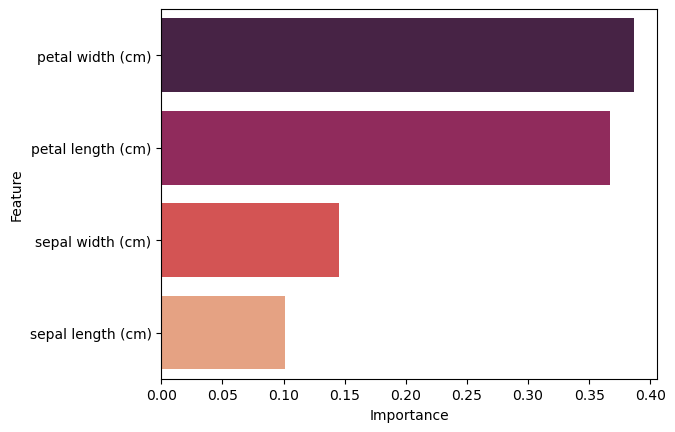

In [17]:
feature_importance = model_ada.feature_importances_
## Create dataframe

importance_df = pd.DataFrame({'Feature': iris.feature_names,'Importance':feature_importance}).sort_values(by='Importance', ascending=False)
importance_df
sns.barplot(x='Importance',y='Feature', data=importance_df, palette='rocket')
plt.show()

### 04. Model accuracy

In [18]:
## Model Accuracy
print(f'Training Accuracy:',accuracy_score(y_pred=y_pred_train, y_true=y_train))
print(f'Test Accuracy:',accuracy_score(y_pred=y_pred,y_true=y_test))

## AUC Score
from sklearn.preprocessing import label_binarize

# ## Binarize labels for multiclass AUC
y_train_bin = label_binarize(y_train, classes=[0,1,2]) ## for 3 classes
y_test_bin = label_binarize(y_test, classes=[0,1,2]) ## for 3 classes

print(f'Training AUC:',roc_auc_score(y_train_bin, y_train_probs,average='macro',multi_class='ovr'))
print(f'Test AUC:',roc_auc_score(y_test_bin, y_probs,average='macro',multi_class='ovr'))

Training Accuracy: 1.0
Test Accuracy: 0.9666666666666667
Training AUC: 1.0
Test AUC: 1.0


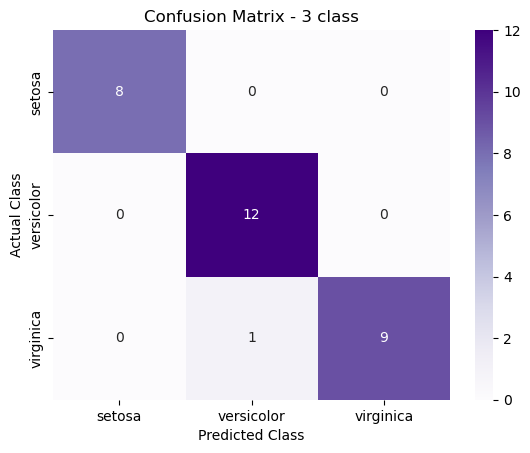

In [19]:
## Confusion matrix
cm = confusion_matrix(y_test,y_pred)

## Plot using seaborn
labels=iris.target_names
sns.heatmap(cm, annot=True, cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - 3 class')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [20]:
## Precision and recall
precision_macro = precision_score(y_test,y_pred, average='macro')
recall_macro = recall_score(y_test,y_pred, average='macro')
print(f'Precision Score:',precision_macro)
print(f'Recall Score:',recall_macro)

Precision Score: 0.9743589743589745
Recall Score: 0.9666666666666667
